# 1 bagging

In [7]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.svm import (LinearSVC, SVC)
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

## data
Utilizaremos un meta estimador que tiene Scikit Learn llamado Bagging Classifier. Al ser un meta estimador podemos adaptarlo a las diferentes familias de estimadores y Scikit Learn lo configurara de forma automática para que se convierta en un método de ensamble.

Utilizaremos el dataset de afecciones cardiacas. Teniamos diferentes datos de pacientes, donde la meta finalmente era clasificarlos en si el paciente tenia o no una afección cardiaca.

In [2]:
df_heart = pd.read_csv('./datasets/heart.csv')

X = df_heart.drop(['target'], axis=1)
y = df_heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3)
df_heart.describe()
                                                

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## usando bagging a un solo modelo
- implementaremos un clasificador no tan bueno para este ejercicio, el cual es KNeighborsClassifier() y veremos su accuracy.
comararemos KNN solo y 50 KNN  usando bagging 
- primero evaluaraemos el modelo KNN solo
- segundo: evaluaremos 50 modelos KNN y obtendremos su consenso usando bagging 

In [4]:
knn_class = KNeighborsClassifier().fit(X_train, y_train)
knn_pred = knn_class.predict(X_test)
print('Accuracy with only KNeighborsClassifier:', accuracy_score(knn_pred, y_test))
print('='*64)


bag_class = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                            n_estimators=50).fit(X_train, y_train)
bag_pred = bag_class.predict(X_test)
print('Accuracy of avarage of 50 KNeighborsClassifier (using bagging):', accuracy_score(bag_pred, y_test))


Accuracy with only KNeighborsClassifier: 0.7207792207792207
Accuracy of avarage of 50 KNeighborsClassifier (using bagging): 0.762987012987013


podemos ver como usando un modelo de clasificacion debil si la aplicamosbagging podemos mejorarlo.  

## bagging con diferentes modelos
ahora realizaremos lo mismo de atras pero con todos los calsificadores de sklearn 

In [12]:

classifiers = {
    'KNeighbors': KNeighborsClassifier(),
    'LogisticRegression' : LogisticRegression(),
    'LinearSCV': LinearSVC(),
    'SVC': SVC(),
    'SGDC': SGDClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomTreeForest' : RandomForestClassifier(random_state=0)
}

## uso de metricas para clasificacion 
siempre es importante saber que tipo de metrica debemos usar segun nuestro problema planteado. en este caso usaremoslas siguientes metricas :
- model score
- cross validation 
- classification_report: muestra falsos negativos, postivos y mas

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics

kf = KFold(n_splits=5)


for name, estimator in classifiers.items():
    bag_class = BaggingClassifier(base_estimator=estimator,
                                    n_estimators=30).fit(X_train, y_train) # 30 modelos utilizaremos 
    
    score = bag_class.score(X_train,y_train)
    print('='*64)
    print(f"Metrica del modelo {name}: {round(score, 5)}")

    scores = cross_val_score(bag_class, X_train, y_train, cv=kf, scoring="accuracy")

    print(f"Metricas cross_validation {name}: {scores}")

    print(f"Media de cross_validation {name}: {round(scores.mean(), 5)}")

    preds = bag_class.predict(X_test)

    score_pred = metrics.accuracy_score(y_test, preds)

    print(f"Metrica en Test {name}: {round(score_pred, 5)}")
    
    
    """
    bag_pred = bag_class.predict(X_test)

    # using different kind of metrics of evaluation 
    print(f'Accuracy Bagging with {name}:', accuracy_score(bag_pred, y_test))"""

Metrica del modelo KNeighbors: 0.88285
Metricas cross_validation KNeighbors: [0.72916667 0.76388889 0.75524476 0.76923077 0.72727273]
Media de cross_validation KNeighbors: 0.74896
Metrica en Test KNeighbors: 0.75
Metrica del modelo LogisticRegression: 0.86332
Metricas cross_validation LogisticRegression: [0.82638889 0.90277778 0.88111888 0.82517483 0.83216783]
Media de cross_validation LogisticRegression: 0.85353
Metrica en Test LogisticRegression: 0.81818
Metrica del modelo LinearSCV: 0.85635
Metricas cross_validation LinearSCV: [0.82638889 0.875      0.86013986 0.82517483 0.82517483]
Media de cross_validation LinearSCV: 0.84238
Metrica en Test LinearSCV: 0.81818
Metrica del modelo SVC: 0.72106
Metricas cross_validation SVC: [0.72222222 0.75694444 0.6993007  0.6993007  0.64335664]
Media de cross_validation SVC: 0.70422
Metrica en Test SVC: 0.66883
Metrica del modelo SGDC: 0.72803
Metricas cross_validation SGDC: [0.69444444 0.77777778 0.74125874 0.72027972 0.67132867]
Media de cross_va

## reporte de clasificacion 
ya que estamos trabajando con diagnostico medico es importante saber cuantos falsos negativos y falsos postivos tuvimos.
 Las columnas corresponden a las etiquetas predichas y las filas a las etiquetas verdaderas.

In [18]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       1.00      0.98      0.99       163

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



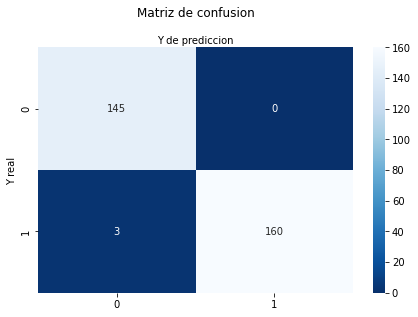

In [32]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
cnf_matrix= metrics.confusion_matrix(y_test, preds)

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Y real")
plt.xlabel("Y de prediccion")
plt.show()

# puedes corroborar los ejes usando:
#print(y_test.value_counts())

tenemos:
- 0: falsos negativos 
- 3: falso positivo = 3 personas que tenian problemas cardiacos, el modelo predijo que no tenian.


## comparamos el desempeño de los modelos sin bagging 
en este caso no se aplicar bagging simplemente sera el modelo


In [14]:
for name, estimator in classifiers.items():
    estimator.fit(X_train, y_train)
    score = estimator.score(X_train,y_train)
    print('='*64)
    print(f"Metrica del modelo {name}: {round(score, 5)}")

    scores = cross_val_score(estimator, X_train, y_train, cv=kf, scoring="accuracy")

    print(f"Metricas cross_validation {name}: {scores}")

    print(f"Media de cross_validation {name}: {round(scores.mean(), 5)}")

    preds = estimator.predict(X_test)

    score_pred = metrics.accuracy_score(y_test, preds)

    print(f"Metrica en Test {name}: {round(score_pred, 5)}")

Metrica del modelo KNeighbors: 0.87308
Metricas cross_validation KNeighbors: [0.71527778 0.75       0.74125874 0.75524476 0.6993007 ]
Media de cross_validation KNeighbors: 0.73222
Metrica en Test KNeighbors: 0.72078
Metrica del modelo LogisticRegression: 0.86471
Metricas cross_validation LogisticRegression: [0.81944444 0.90277778 0.86013986 0.82517483 0.8041958 ]
Media de cross_validation LogisticRegression: 0.84235
Metrica en Test LogisticRegression: 0.83117
Metrica del modelo LinearSCV: 0.7894
Metricas cross_validation LinearSCV: [0.70833333 0.61111111 0.6993007  0.75524476 0.70629371]
Media de cross_validation LinearSCV: 0.69606
Metrica en Test LinearSCV: 0.75
Metrica del modelo SVC: 0.7113
Metricas cross_validation SVC: [0.70138889 0.75694444 0.6993007  0.6993007  0.65034965]
Media de cross_validation SVC: 0.70146
Metrica en Test SVC: 0.65909
Metrica del modelo SGDC: 0.51325
Metricas cross_validation SGDC: [0.76388889 0.80555556 0.74825175 0.70629371 0.70629371]
Media de cross_vali

## concluciones 
podemos ver como en la mayoria de los casos usar bagging aumenta el rendimiento de nuestro modelo. 
el modelo RandomTreeForest a demostrado ser el mejor clasificador en todos los casos

# 2 boosting
Implementaremos [GradientBoostingClassifier](https://en.wikipedia.org/wiki/Gradient_boosting) un algoritmo boosting basado en arboles de decisión. Podemos encontrar mas información en la [documentación oficial de Scikit Learn](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting)

Hicimos la implementación con 50 estimadores y obtuvimos lo siguiente:
- este modelo utiliza arboles de decision de fondo, creara arboles con muy poca profundidady pocas hojas y los entrenara y detras de otro. 

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
# Con cross validation podemos optimizar la cantidad de estimadores que deberiamos utilizar
boost = GradientBoostingClassifier(n_estimators=50).fit(X_train, y_train) # 50 arboles utilizaremos
boost_pred = boost.predict(X_test)
print('='*64)
print('GradientBoostingClassifier accuracy :', accuracy_score(boost_pred, y_test))



GradientBoostingClassifier accuracy : 0.922077922077922


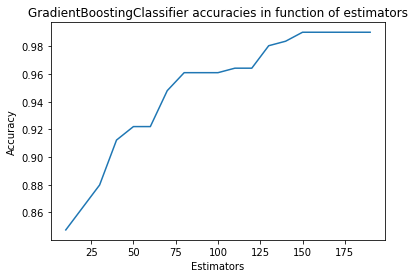

best_est_num:  150


In [40]:
# Graficando
estimators = range(10, 200, 10)
total_accuracy = {}
for i in estimators:
    boost = GradientBoostingClassifier(n_estimators=i).fit(X_train, y_train)
    boost_pred = boost.predict(X_test)

    total_accuracy[i] = accuracy_score(y_test, boost_pred)

plt.plot(estimators, total_accuracy.values())
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.title('GradientBoostingClassifier accuracies in function of estimators')
plt.show()

max_accu = np.array(list(total_accuracy.values())).max()
best_est_num = {k: v for k, v in total_accuracy.items()
                if v == max_accu}
best_est_num = list(best_est_num)
print("best_est_num: ", best_est_num[0])

In [42]:
# sin necesidad de aumentar mucho los estimadores podemos modificar otros parametros
boosting = GradientBoostingClassifier(loss='exponential',
learning_rate=0.15, 
n_estimators=100, 
max_depth=5).fit(X_train, y_train)
boost_pred = boost.predict(X_test)
print(accuracy_score(y_test, boost_pred))

0.9902597402597403
